In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('/Users/prathammehta/Downloads/events.csv')

# Data Cleaning
# =============================================

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill empty strings with NaN and then fill missing values
df['Cleanup Status'] = df['Cleanup Status'].fillna('Not Cleaned')
df['Alert'] = df['Alert'].fillna('No')
df['Root Cause'] = df['Root Cause'].fillna('Unknown')
df['Business File'] = df['Business File'].fillna('Unknown')
df['User Groups'] = df['User Groups'].fillna('Unknown')

# Convert timestamp to datetime and extract features
df['When'] = pd.to_datetime(df['When'])
df['Date'] = df['When'].dt.date
df['Hour'] = df['When'].dt.hour
df['DayOfWeek'] = df['When'].dt.day_name()
df['DayOfWeekNum'] = df['When'].dt.dayofweek

# Clean up threat names by removing extra spaces and standardizing
df['Threat Name'] = df['Threat Name'].str.strip()
df['Threat Name'] = df['Threat Name'].replace({
    'Generic Reputation PUA': 'PUA',
    'Microsoft Activation Scripts': 'PUA: Activation Scripts',
    'Troj/JSInject-C': 'Trojan: JSInject-C',
    'Troj/HTMLInj-A': 'Trojan: HTMLInj-A',
    'Mal/DrodRar-AIC': 'Malware: DrodRar-AIC'
})

# Extract domain from user
df['User Domain'] = df['User'].str.extract(r'(.*?)\\.*')[0]
df['Username'] = df['User'].str.extract(r'\\.*?(\w+\.\w+)')



Missing values per column:
When               0
Threat Name        0
Threat Path        0
Event              0
Cleanup Status    10
Severity           0
Alert              0
Root Cause         0
Business File      0
User               0
User Groups       31
Device             0
Device Group       0
IPAddress          0
dtype: int64


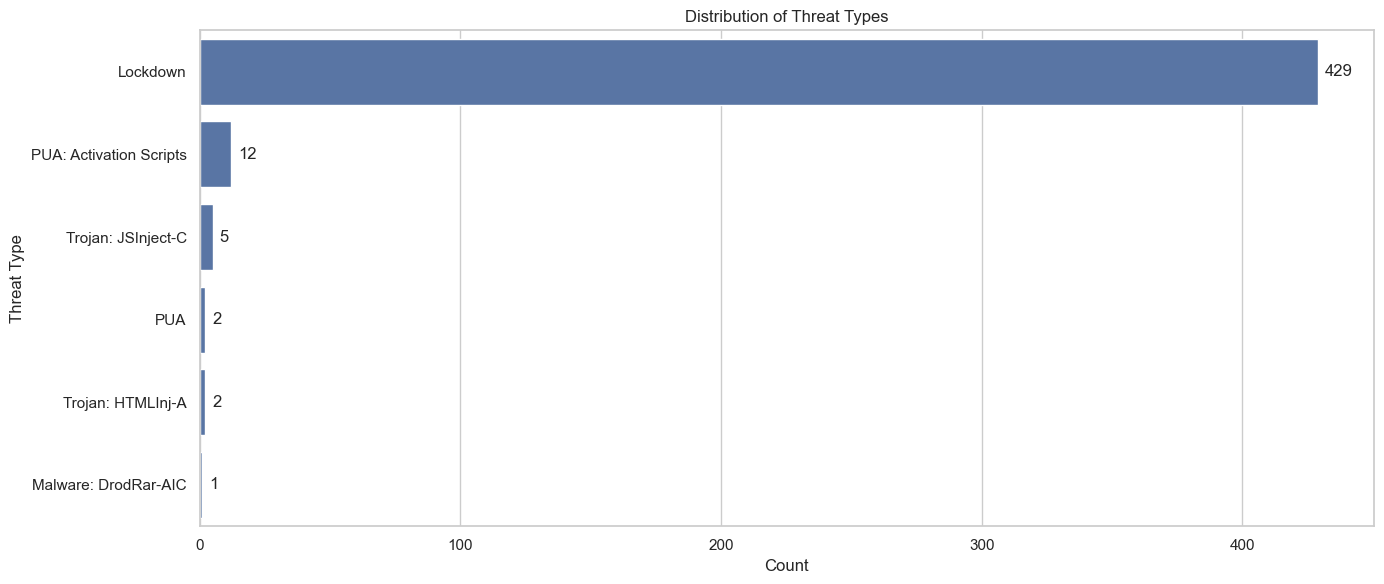

In [16]:
# Data Analysis
# =============================================

# 1. Threat Distribution Analysis
# Calculate threat counts
threat_counts = df['Threat Name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, y='Threat Name', order=threat_counts.index)

# Add value labels next to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.title('Distribution of Threat Types')
plt.xlabel('Count')
plt.ylabel('Threat Type')
plt.tight_layout()
plt.savefig('threat_distribution_annotated.png')
plt.show()

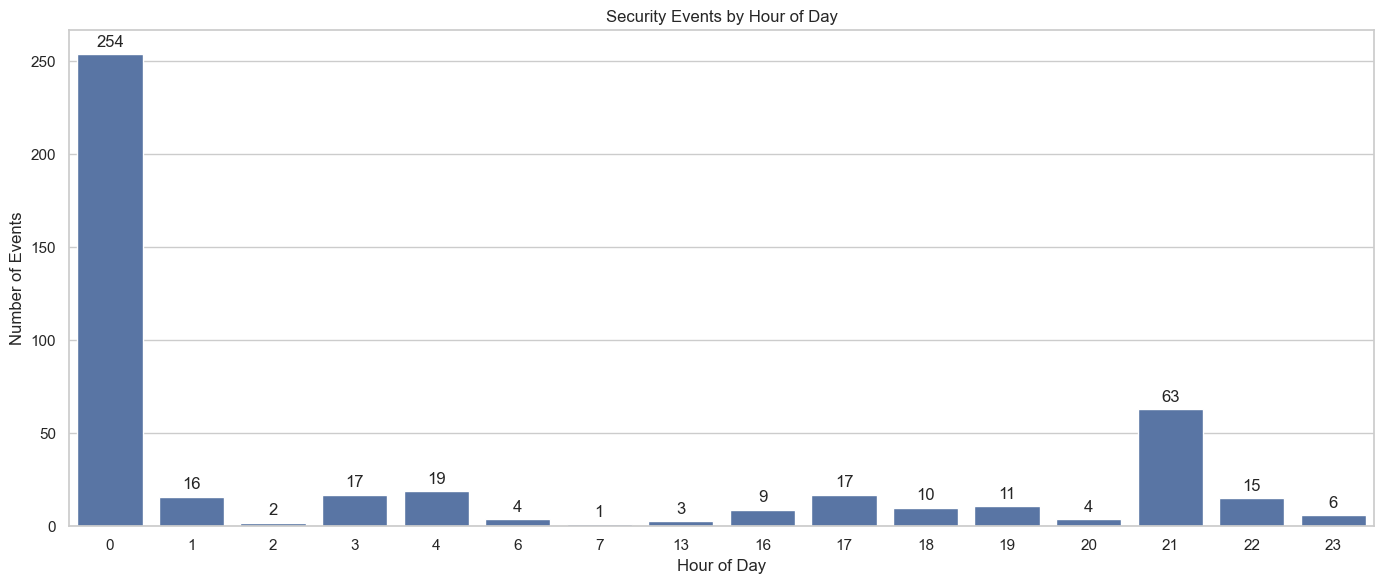

In [17]:
# 2. Temporal Analysis
# By hour of day
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='Hour')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Security Events by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.savefig('events_by_hour_annotated.png')
plt.show()

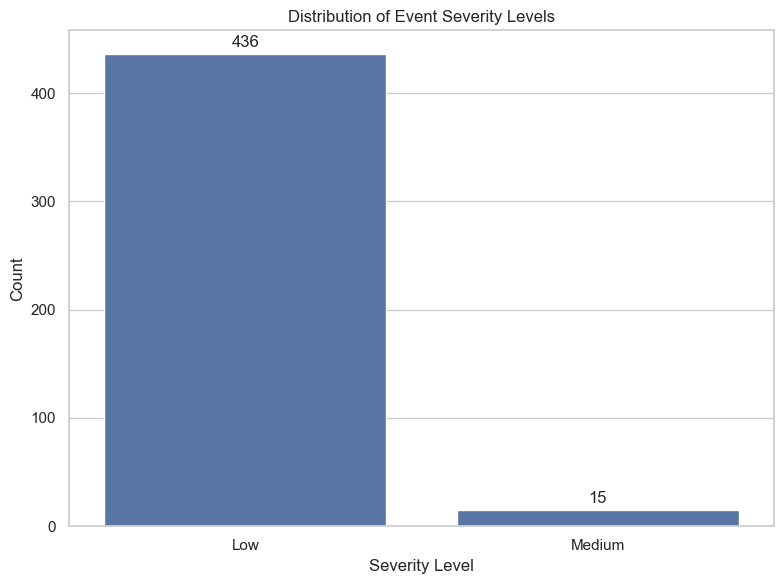

In [18]:
severity_counts = df['Severity'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Severity', order=severity_counts.index)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Distribution of Event Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('severity_distribution_annotated.png')
plt.show()


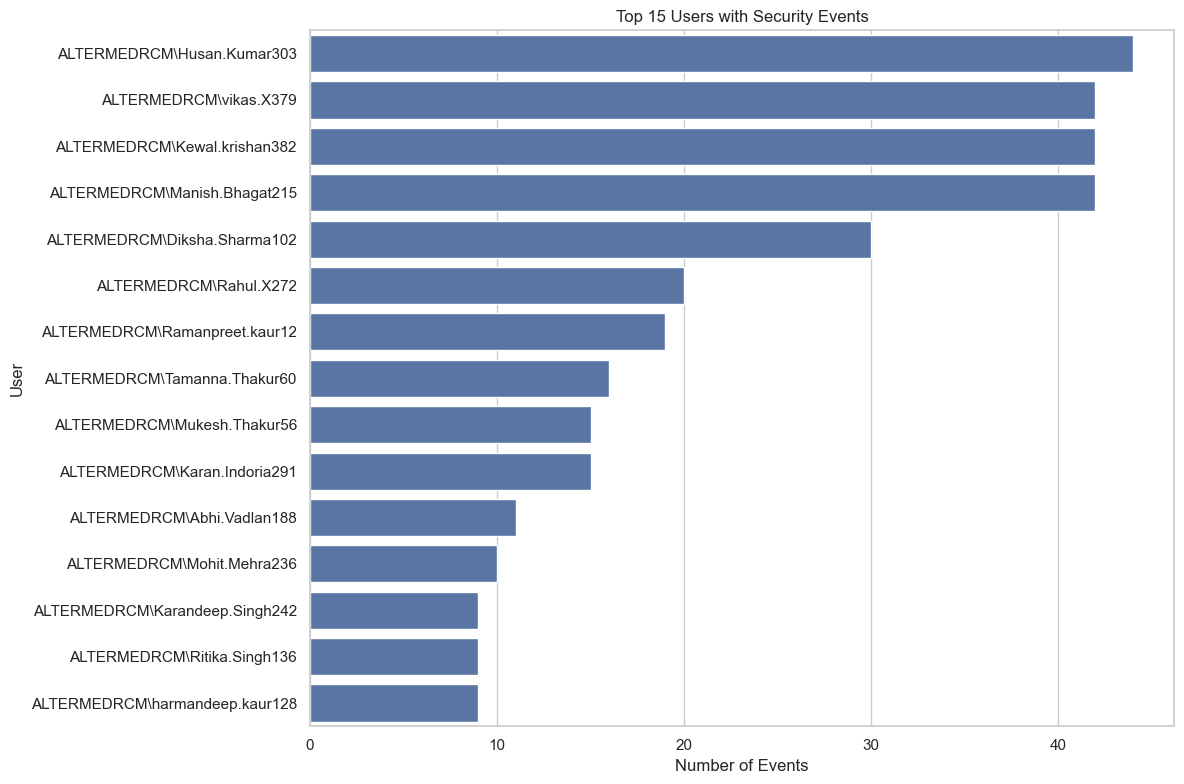

In [19]:
# 4. Top Users with Security Events
top_users = df['User'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_users.index, x=top_users.values)
plt.title('Top 15 Users with Security Events')
plt.xlabel('Number of Events')
plt.ylabel('User')
plt.tight_layout()
plt.savefig('top_users_events.png')
plt.show()

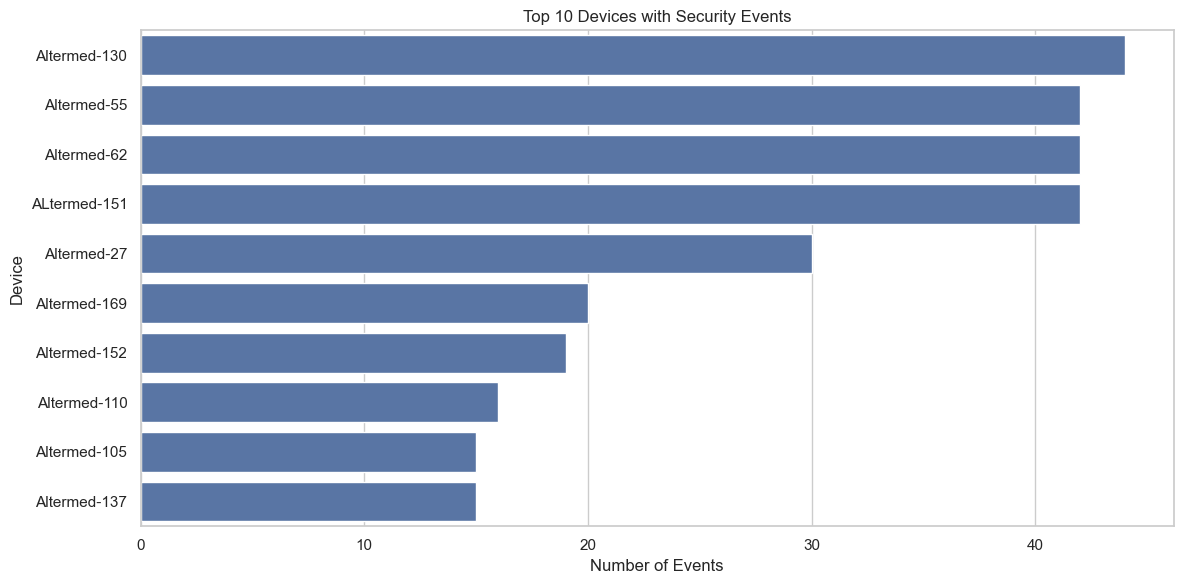

In [20]:
# 5. Device Analysis
top_devices = df['Device'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_devices.index, x=top_devices.values)
plt.title('Top 10 Devices with Security Events')
plt.xlabel('Number of Events')
plt.ylabel('Device')
plt.tight_layout()
plt.savefig('top_devices_events.png')
plt.show()

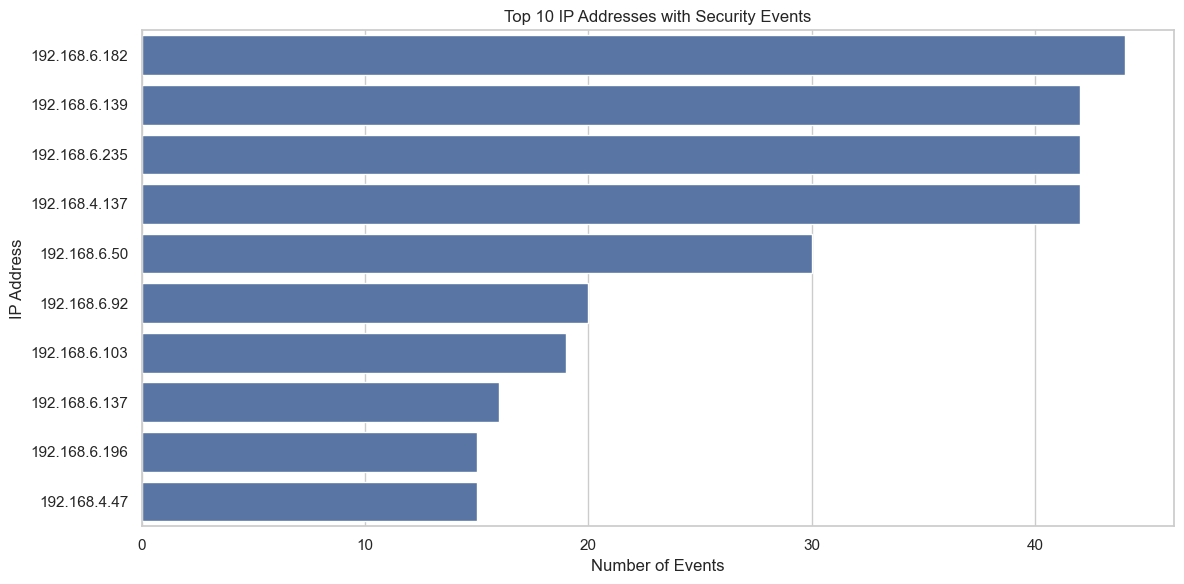

In [21]:
# 6. IP Address Analysis
top_ips = df['IPAddress'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_ips.index, x=top_ips.values)
plt.title('Top 10 IP Addresses with Security Events')
plt.xlabel('Number of Events')
plt.ylabel('IP Address')
plt.tight_layout()
plt.savefig('top_ips_events.png')
plt.show()

/var/folders/t4/3jh8m4ld7hn4mwwbvrp2vgpr0000gn/T/ipykernel_41595/4221616874.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['No Cleaning Required', 'Not Cleaned', 'Cleaned'])


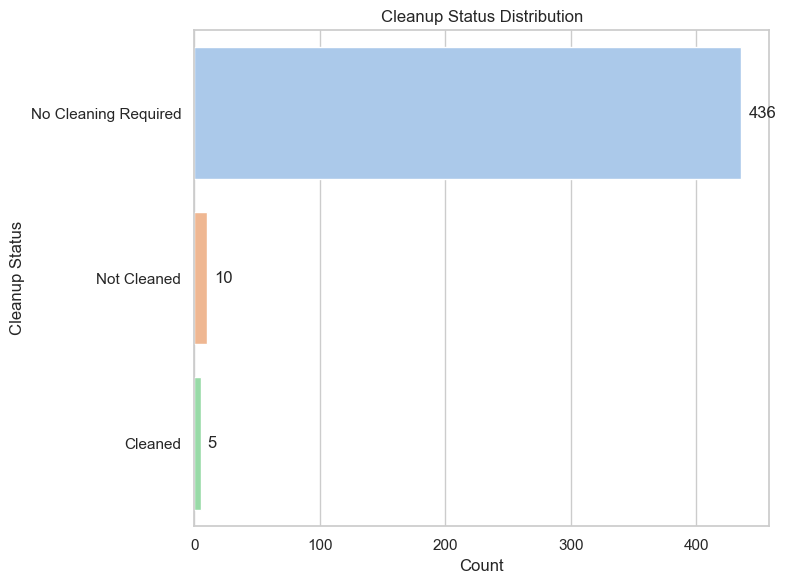

In [22]:
cleanup_status = df['Cleanup Status'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='Cleanup Status', order=cleanup_status.index, palette='pastel')

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.title('Cleanup Status Distribution')
plt.xlabel('Count')
plt.ylabel('Cleanup Status')

# Optional: Rename y-tick labels (only if you want to relabel them)
ax.set_yticklabels(['No Cleaning Required', 'Not Cleaned', 'Cleaned'])  

plt.tight_layout()
plt.savefig('cleanup_status_annotated.png')
plt.show()


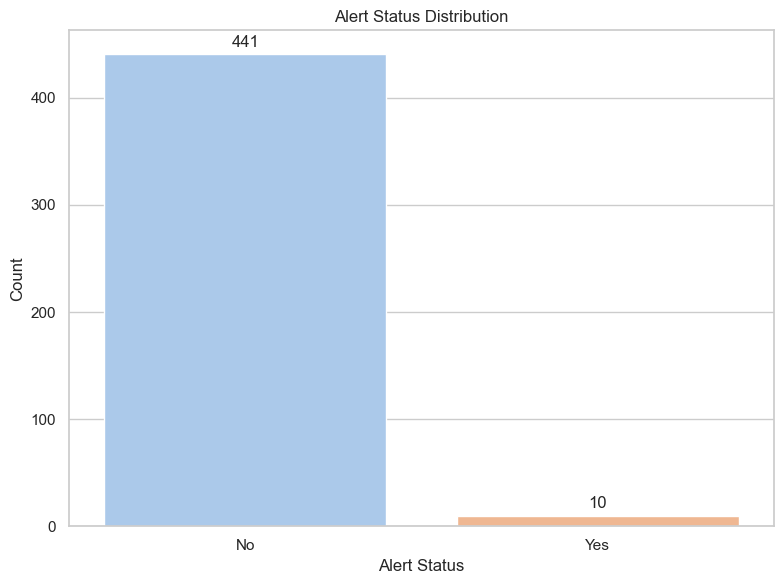

In [23]:
alert_status = df['Alert'].value_counts()


plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Alert', order=alert_status.index, palette='pastel')

# Add annotations on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Alert Status Distribution')
plt.xlabel('Alert Status')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('alert_status_annotated.png')
plt.show()


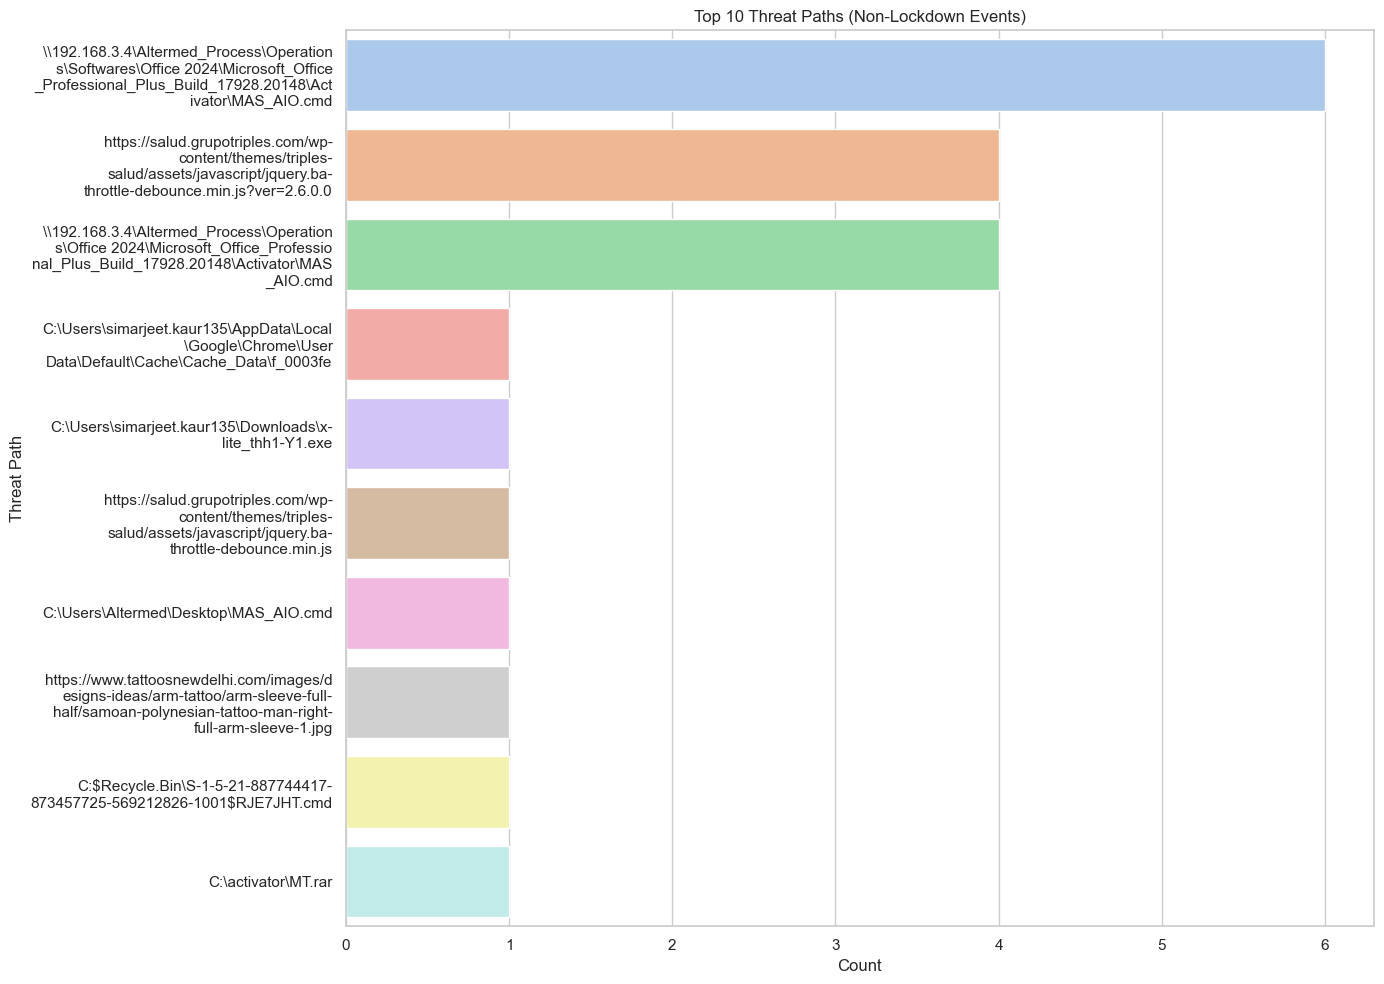

In [25]:
import textwrap
non_lockdown = df[df['Threat Name'] != 'Lockdown']
common_paths = non_lockdown['Threat Path'].dropna().value_counts().head(10)
# Wrap each path to a max width of 40 characters
wrapped_labels = [textwrap.fill(label, width=40) for label in common_paths.index]

plt.figure(figsize=(14, 10))
sns.barplot(y=wrapped_labels, x=common_paths.values, palette='pastel')
plt.title('Top 10 Threat Paths (Non-Lockdown Events)')
plt.xlabel('Count')
plt.ylabel('Threat Path')
plt.tight_layout()
plt.savefig('threat_paths_wrapped.png')
plt.show()


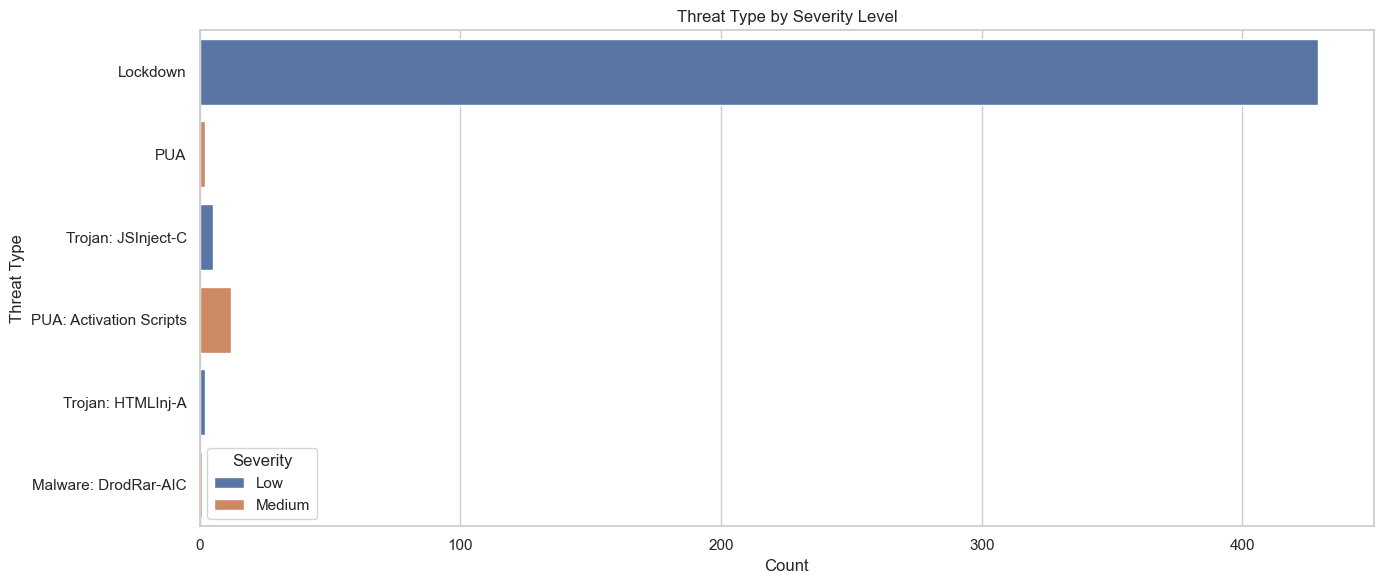

In [26]:
# 10. Correlation between Threat Type and Severity
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='Threat Name', hue='Severity')
plt.title('Threat Type by Severity Level')
plt.xlabel('Count')
plt.ylabel('Threat Type')
plt.legend(title='Severity')
plt.tight_layout()
plt.savefig('threat_severity.png')
plt.show()

# Medium Level Threat Analysis

In [27]:
# Filter for medium threat events
medium_threats = df[df['Severity'] == 'Medium']

# 1. Basic Overview
print(f"Total medium threat events: {len(medium_threats)}")
print("\nMedium Threat Distribution:")
print(medium_threats['Threat Name'].value_counts())

Total medium threat events: 15

Medium Threat Distribution:
Threat Name
PUA: Activation Scripts    12
PUA                         2
Malware: DrodRar-AIC        1
Name: count, dtype: int64


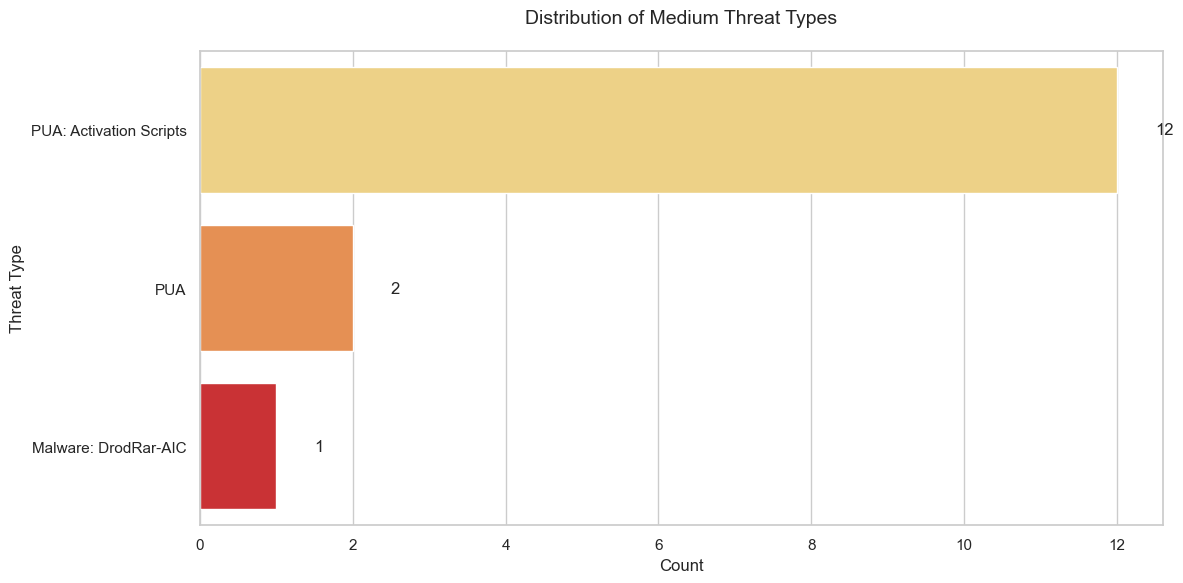

In [28]:
# 2. Medium Threat Type Analysis
plt.figure(figsize=(12, 6))
threat_counts = medium_threats['Threat Name'].value_counts()
ax = sns.countplot(data=medium_threats, y='Threat Name', order=threat_counts.index, palette='YlOrRd')
plt.title('Distribution of Medium Threat Types', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Threat Type', fontsize=12)

# Add count annotations
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height()/2., 
            f'{int(width)}', 
            ha='left', va='center')

plt.tight_layout()
plt.savefig('medium_threat_types.png', dpi=300)
plt.show()

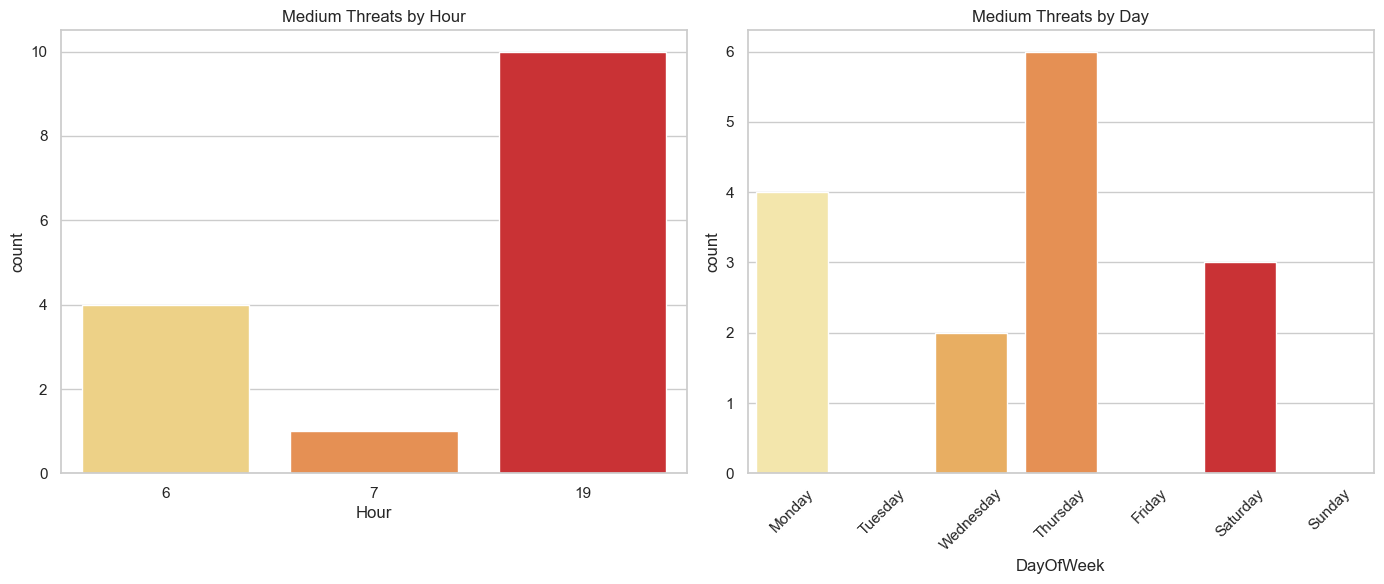

In [29]:
# 3. Temporal Analysis of Medium Threats
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=medium_threats, x='Hour', palette='YlOrRd')
plt.title('Medium Threats by Hour', fontsize=12)

plt.subplot(1, 2, 2)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=medium_threats, x='DayOfWeek', order=day_order, palette='YlOrRd')
plt.title('Medium Threats by Day', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('medium_threats_temporal.png', dpi=300)
plt.show()

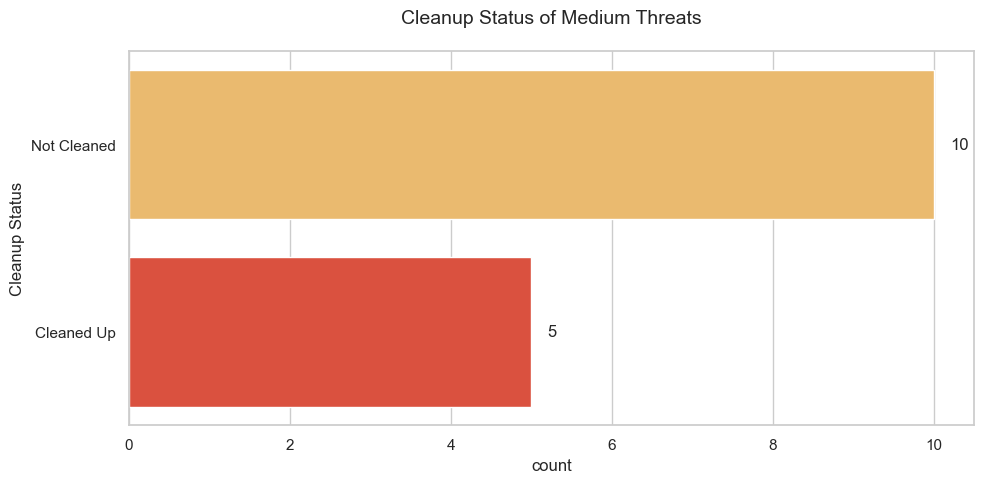

In [30]:
# 4. Cleanup Status of Medium Threats
plt.figure(figsize=(10, 5))
cleanup_counts = medium_threats['Cleanup Status'].value_counts()
ax = sns.countplot(data=medium_threats, y='Cleanup Status', order=cleanup_counts.index, palette='YlOrRd')
plt.title('Cleanup Status of Medium Threats', fontsize=14, pad=20)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.2, p.get_y() + p.get_height()/2., 
            f'{int(width)}', 
            ha='left', va='center')

plt.tight_layout()
plt.savefig('medium_threats_cleanup.png', dpi=300)
plt.show()

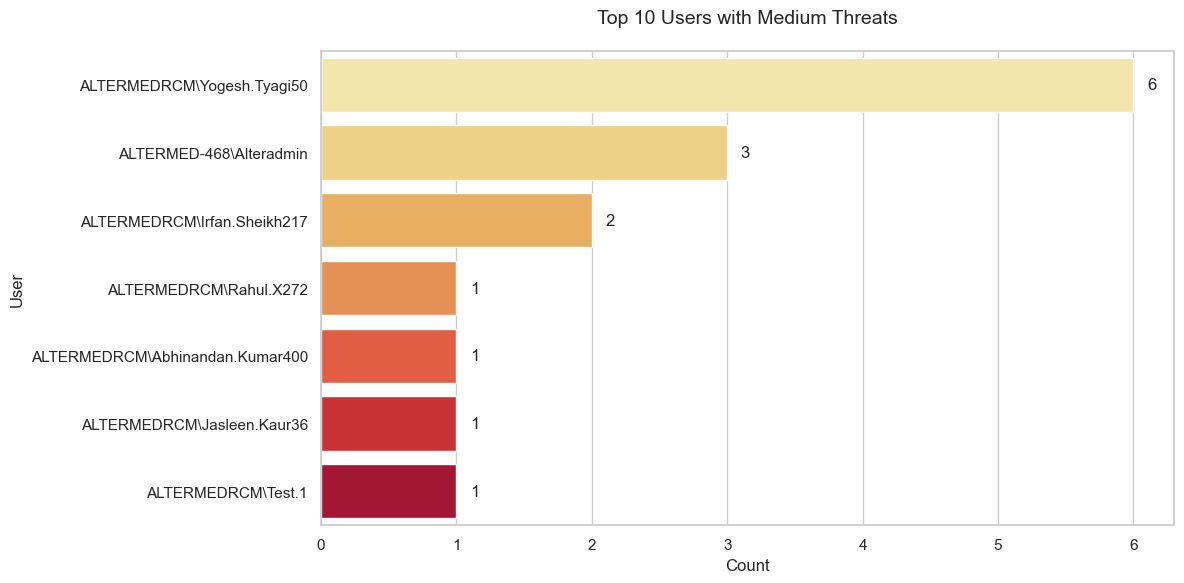

In [31]:
# 5. Top Users with Medium Threats
top_users = medium_threats['User'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=top_users.index, x=top_users.values, palette='YlOrRd')
plt.title('Top 10 Users with Medium Threats', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('User', fontsize=12)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2., 
            f'{int(width)}', 
            ha='left', va='center')

plt.tight_layout()
plt.savefig('medium_threats_users.png', dpi=300)
plt.show()


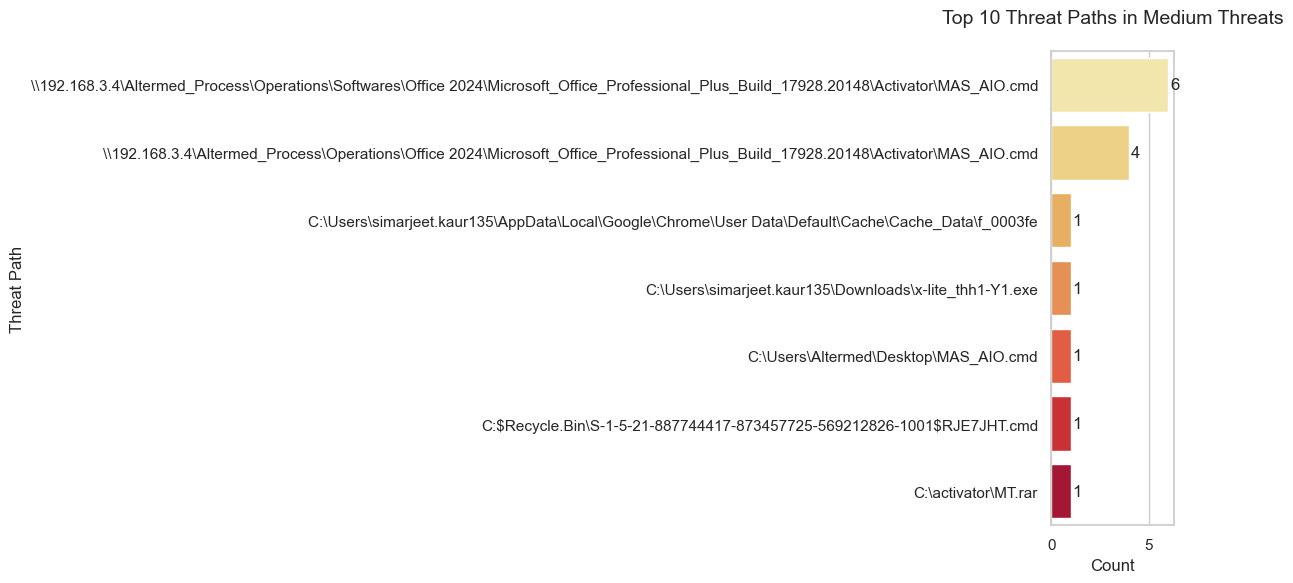

In [32]:
# 6. Threat Path Analysis for Medium Threats
wrapped_labels = [textwrap.fill(label, width=40) for label in common_paths.index]

if not medium_threats.empty:
    threat_paths = medium_threats['Threat Path'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(y=threat_paths.index, x=threat_paths.values, palette='YlOrRd')
    plt.title('Top 10 Threat Paths in Medium Threats', fontsize=14, pad=20)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Threat Path', fontsize=12)
    
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height()/2., 
                f'{int(width)}', 
                ha='left', va='center')
    
    plt.tight_layout()
    plt.savefig('medium_threats_paths.png', dpi=300)
    plt.show()

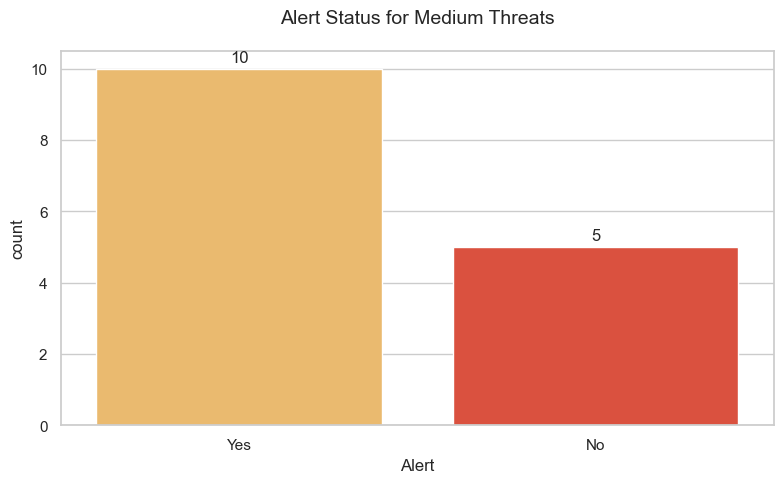

In [33]:
# 8. Alert Status Analysis
plt.figure(figsize=(8, 5))
alert_counts = medium_threats['Alert'].value_counts()
ax = sns.countplot(data=medium_threats, x='Alert', order=alert_counts.index, palette='YlOrRd')
plt.title('Alert Status for Medium Threats', fontsize=14, pad=20)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{int(height)}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig('medium_threats_alerts.png', dpi=300)
plt.show()